In [1]:
import numpy as np
import matplotlib.pyplot as plt
from features import *
import neural_net
%load_ext autoreload
%autoreload 2
import load_cifar

dataset_dir = 'F:\ML\Winter-2016-CS231N-master\Assignment1\cs231n\datasets\cifar-10-batches-py'

In [2]:
Xtr,ytr,Xte,yte = load_cifar.load(dataset_dir)

In [3]:
Xvl , yvl = Xtr[49000:],ytr[49000:]
Xte , yte = Xte[:1000],yte[:1000]
Xtr , ytr = Xtr[:49000],ytr[:49000]

In [4]:
num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(Xtr, feature_fns, verbose=True)
X_val_feats = extract_features(Xvl, feature_fns)
X_test_feats = extract_features(Xte, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [5]:
X_train_feats.shape

(49000, 155)

In [5]:
import svm
max_count = 100
lrs = []
landas = []
for i in range(max_count): 
    lrs.append(10**np.random.uniform(-3,3))
    landas.append(10**np.random.uniform(-5,5))

In [6]:
for j in range(max_count):
    W, loss, tr_acc = svm.train(X_train_feats,ytr,200,landas[j],lrs[j],10)
    vl_acc = svm.predict(X_val_feats,yvl,W)
    print('tr_acc:%f vl_acc:%f landa:%f lr:%f'%(tr_acc[-1],vl_acc,landas[j],lrs[j]))
    

tr_acc:0.397347 vl_acc:0.396000 landa:0.067042 lr:0.003773
tr_acc:0.397020 vl_acc:0.396000 landa:0.012084 lr:0.003303
tr_acc:0.396388 vl_acc:0.397000 landa:0.384310 lr:0.001335
tr_acc:0.389000 vl_acc:0.382000 landa:0.054324 lr:0.743551
tr_acc:0.396592 vl_acc:0.396000 landa:0.122714 lr:0.002997
tr_acc:0.435551 vl_acc:0.432000 landa:0.005039 lr:0.016469
tr_acc:0.412000 vl_acc:0.390000 landa:0.183392 lr:0.291315
tr_acc:0.396327 vl_acc:0.399000 landa:0.466736 lr:0.001158
tr_acc:0.435816 vl_acc:0.423000 landa:0.001233 lr:0.155613
tr_acc:0.433592 vl_acc:0.415000 landa:0.003908 lr:0.164115
tr_acc:0.442388 vl_acc:0.430000 landa:0.040065 lr:0.119491
tr_acc:0.402878 vl_acc:0.404000 landa:0.002627 lr:0.004967
tr_acc:0.450286 vl_acc:0.438000 landa:0.001670 lr:0.052939
tr_acc:0.444020 vl_acc:0.424000 landa:0.002187 lr:0.100715
tr_acc:0.429163 vl_acc:0.401000 landa:0.003621 lr:0.206372
tr_acc:0.345551 vl_acc:0.324000 landa:0.624879 lr:0.380855
tr_acc:0.431959 vl_acc:0.400000 landa:0.007023 lr:0.1936

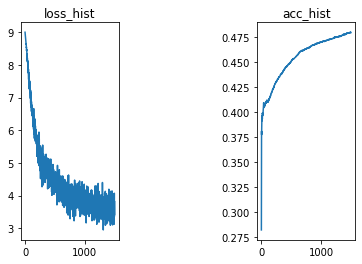

In [22]:
import svm
W, loss_hist, tr_acc_hist = svm.train(X_train_feats,ytr,200,4e-3,3e-4,1500) #8e-3
vl_acc = svm.predict(X_val_feats,yvl,W)
#print('tr_acc:%f vl_acc:%f landa:%f lr:%f loss:%f '%(tr_acc,vl_acc,landas[j],lrs[j],loss))
plt.subplot(131)
plt.title('loss_hist')
plt.plot(loss_hist)
plt.subplot(133)
plt.title('acc_hist')
plt.plot(tr_acc_hist)
plt.show()

In [24]:
svm.predict(X_test_feats,yte,W)

0.473

99,loss:0.009426   tr:1.000000    vl:0.240000
199,loss:0.010545   tr:1.000000    vl:0.240000


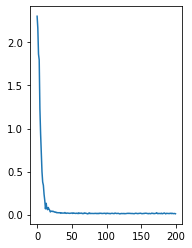

In [6]:
#train(self,Xtr,ytr,Xvl,yvl,lr=1e-3,lr_decay=0.95,landa=1e-5,num_iters=100,batch_size=200,)
nn = neural_net.TwoLayerNet(X_train_feats.shape[1],500,10,1e-2)
stats = nn.train(X_train_feats[:50],ytr[:50],X_val_feats[:50],yvl[:50],1.2,0.95,8e-5,200,30) # 4e-2_1  1.2e-1_1e-2


#plt.subplot(121)
#plt.plot(stats["tr_acc_hist"])
plt.subplot(121)
plt.plot(stats["loss_hist"])
plt.show()

In [67]:
np.random.lognormal(1,4)

0.005581351736545423

In [83]:
max_count = 10
lrs = []
landas = []
for i in range(max_count): 
    lrs.append(10**np.random.uniform(-1,1))
    landas.append(10**np.random.uniform(-2,-6))

In [84]:
import neural_net
for i in range(max_count):
    nn = neural_net.TwoLayerNet(X_train_feats.shape[1],500,10,1e-2)
    l,trh,vlh = nn.train(X_train_feats,ytr,X_val_feats,yvl,lrs[i],0.90,landas[i],500,200)
    print("%d ,loss:%f   landa:%f   tr_acc:%f   vl_acc:%f   lr:%f" % (i,l,landas[i],trh,vlh,lrs[i]))

0 ,loss:1.482740   landa:0.000101   tr_acc:0.496531   vl_acc:0.492000   lr:3.366970
1 ,loss:1.558536   landa:0.000027   tr_acc:0.482041   vl_acc:0.471000   lr:6.673441
2 ,loss:1.898192   landa:0.000044   tr_acc:0.383408   vl_acc:0.389000   lr:0.809150
3 ,loss:1.889436   landa:0.000003   tr_acc:0.384612   vl_acc:0.388000   lr:0.823702
4 ,loss:2.279842   landa:0.000001   tr_acc:0.292122   vl_acc:0.293000   lr:0.113154
5 ,loss:2.068623   landa:0.000001   tr_acc:0.364102   vl_acc:0.367000   lr:0.559557
6 ,loss:1.581507   landa:0.006619   tr_acc:0.494551   vl_acc:0.495000   lr:4.052716
7 ,loss:1.487920   landa:0.000155   tr_acc:0.504347   vl_acc:0.504000   lr:5.357216
8 ,loss:1.904739   landa:0.000091   tr_acc:0.382143   vl_acc:0.388000   lr:0.798611
9 ,loss:2.233216   landa:0.003046   tr_acc:0.333531   vl_acc:0.313000   lr:0.314278


99,loss:1.375307   tr:0.499286    vl:0.489000
199,loss:1.463260   tr:0.499245    vl:0.489000
299,loss:1.415064   tr:0.499245    vl:0.489000
399,loss:1.474078   tr:0.499245    vl:0.489000
499,loss:1.492695   tr:0.499245    vl:0.489000
599,loss:1.357911   tr:0.499245    vl:0.489000
699,loss:1.417949   tr:0.499245    vl:0.489000
799,loss:1.486027   tr:0.499245    vl:0.489000
899,loss:1.381700   tr:0.499245    vl:0.489000
999,loss:1.374493   tr:0.499245    vl:0.489000


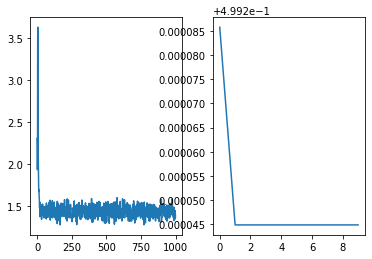

In [106]:
#train(self,Xtr,ytr,Xvl,yvl,lr=1e-3,lr_decay=0.95,landa=1e-5,num_iters=100,batch_size=200,)
net = neural_net.TwoLayerNet(X_train_feats.shape[1],500,10,1e-2)
stats = net.train(X_train_feats,ytr,X_val_feats,yvl,5.357216,0.9,1e-4,1000,300) 
plt.subplot(121)
plt.plot(stats['loss_hist'])
plt.subplot(122)
plt.plot(stats['tr_acc_hist'])
plt.show()


In [94]:
y_pred = nn.predict(X_test_feats)
np.mean(y_pred == yte)

0.313